### Import Modules and Python Functions

In [21]:
import os
import numpy as np
import pandas as pd
import yaml
with open('../python/variables.yaml') as info:
    VARS = yaml.load(info, Loader=yaml.FullLoader)

#os.path.join( os.path.dirname('__file__' ), '../python' )
#from from_csv_to_df import get_select_data

### Import Variables

In [22]:
# Events
events_csv = VARS['EVENTS_CSV']
events_cols_all = VARS['EVENTS_COLS_ALL']
events_cols_select = VARS['EVENTS_COLS_SELECT']

# Mentions
mentions_csv = VARS['MENTIONS_CSV']
mentions_cols_all = VARS['MENTIONS_COLS_ALL']
mentions_cols_select = VARS['MENTIONS_COLS_SELECT']

# Pilot
cameo_codes = VARS['PILOT_CAMEO_VERB_CODES']
select_countries_60 = VARS['PILOT_COUNTRIES_IOS2']

### Import Data

In [23]:
def get_select_data(filepath: str, all_cols: list, select_cols: list) -> object:
    """Get Select Columns of Data from GDELT Latest Update CSV
    :param filepath: full filename and path to CSV file to be imported
    :param all_cols: column names of the CSV imported
    :param select_cols: derivative list of columns from all_cols
    :rtype: dataframe
    :return: dataframe
    """

    # Import entire CSV
    latest_update_df = pd.DataFrame(pd.read_csv(filepath,
                                                names=all_cols,
                                                delimiter="\t"))

    # Select specific columns
    return latest_update_df[select_cols]

#### Events Data

In [24]:
# get data
e1_df = get_select_data(events_csv,
                        events_cols_all,
                        events_cols_select)

e2_df = get_select_data('../select_data/data/latest_gdelt_events_2.csv',
                        events_cols_all,
                        events_cols_select)

gdelt_se_df = pd.merge(e1_df, e2_df, on=events_cols_select, how='outer')
print(gdelt_se_df.shape)
print(gdelt_se_df.info())
gdelt_se_df.head(1)

(2506, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 2505
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GLOBALEVENTID          2506 non-null   int64  
 1   EventCode              2506 non-null   int64  
 2   EventRootCode          2506 non-null   int64  
 3   QuadClass              2506 non-null   int64  
 4   GoldsteinScale         2506 non-null   float64
 5   ActionGeo_Type         2506 non-null   int64  
 6   ActionGeo_FullName     2446 non-null   object 
 7   ActionGeo_CountryCode  2448 non-null   object 
 8   ActionGeo_Lat          2446 non-null   float64
 9   ActionGeo_Long         2446 non-null   float64
 10  SOURCEURL              2506 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 234.9+ KB
None


,GLOBALEVENTID,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL
0,972238884,20,2,1,3.0,4,"Canberra, Australian Capital Territory, Australia",AS,-35.2833,149.217,https://www.aninews.in/news/world/asia/china-a...


In [25]:
print('Number of Global Event Ids: ', len(gdelt_se_df['GLOBALEVENTID'].unique()))

Number of Global Event Ids:  2506


### Mentions Data

In [26]:
# get data
m1_df = get_select_data(mentions_csv,
                              mentions_cols_all,
                              mentions_cols_select)

m2_df = get_select_data('../select_data/data/latest_gdelt_mentions_2.csv',
                              mentions_cols_all,
                              mentions_cols_select)

gdelt_sm_df = pd.merge(m1_df, m2_df, on=mentions_cols_select, how='outer')
print(gdelt_sm_df.shape)
print(gdelt_sm_df.info())
gdelt_sm_df.head(1)

(4325, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4325 entries, 0 to 4324
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GLOBALEVENTID    4325 non-null   int64  
 1   EventTimeDate    4325 non-null   int64  
 2   MentionTimeDate  4325 non-null   int64  
 3   Confidence       4325 non-null   int64  
 4   MentionDocTone   4325 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 202.7 KB
None


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone
0,972238884,20210301204500,20210301204500,20,-6.52921


In [27]:
print('Number of Global Event Ids: ', len(gdelt_sm_df['GLOBALEVENTID'].unique()))

Number of Global Event Ids:  3229


#### Select Mentions within first 60 Days of an Event

In [28]:
# Calculate days between
gdelt_sm_df['DaysBetween'] = gdelt_sm_df['MentionTimeDate'] - gdelt_sm_df['EventTimeDate']
#print(gdelt_sm_df['DaysBetween'][0])

# Drop rows where days_between <= 60 days
gdelt_sm_60d_df = gdelt_sm_df[gdelt_sm_df['DaysBetween'] <= 60].reset_index(drop=True)
print(gdelt_sm_60d_df.shape)
print('Number of Global Event Ids: ', len(gdelt_sm_60d_df['GLOBALEVENTID'].unique()))
gdelt_sm_60d_df.head()

(1324, 6)
Number of Global Event Ids:  1212


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween
0,972238884,20210301204500,20210301204500,20,-6.529210,0
1,972238885,20210301204500,20210301204500,20,-6.529210,0
2,972238886,20210301204500,20210301204500,60,-6.529210,0
3,972238887,20210301204500,20210301204500,40,-4.385965,0
4,972238888,20210301204500,20210301204500,40,-4.385965,0


In [29]:
# Verify output
max(gdelt_sm_60d_df['DaysBetween'])

0

#### Change int64 dates to datetimes

In [30]:
date_format = '%Y%m%d%H%M%S'
gdelt_sm_60d_df['EventTimeDate'] = pd.to_datetime(gdelt_sm_60d_df['EventTimeDate'].astype(str), format=date_format)
gdelt_sm_60d_df['MentionTimeDate'] = pd.to_datetime(gdelt_sm_60d_df['MentionTimeDate'].astype(str), format=date_format)
gdelt_sm_60d_df.head()

,GLOBALEVENTID,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween
0,972238884,2021-03-01 20:45:00,2021-03-01 20:45:00,20,-6.529210,0
1,972238885,2021-03-01 20:45:00,2021-03-01 20:45:00,20,-6.529210,0
2,972238886,2021-03-01 20:45:00,2021-03-01 20:45:00,60,-6.529210,0
3,972238887,2021-03-01 20:45:00,2021-03-01 20:45:00,40,-4.385965,0
4,972238888,2021-03-01 20:45:00,2021-03-01 20:45:00,40,-4.385965,0


#### Group Mentions Data by GlobalEventId for Average Confidence and Mention Tone

agg_cols = ['GLOBALEVENTID','MeanConfidence', 'MeanMentionDocTone']

gdelt_sm_60d_agg_df = gdelt_sm_60d_df.groupby(['GLOBALEVENTID', 'EventTimeDate'], as_index=False,
                                             ).mean() # get mean Confidence, Tone, DaysBetween
gdelt_sm_60d_agg_df.head()

### Join Events and Mentions Data on GlobalEventId

In [31]:
print('Events Data: ', gdelt_se_df.shape)
print('Mentions Data: ', gdelt_sm_60d_df.shape)

# Merge dataframes
merged_df = gdelt_se_df.merge(gdelt_sm_60d_df, how='left', on='GLOBALEVENTID')
print('Merged Data w/ Duplicates: ', merged_df.shape)

# Drop duplicates
merged_df = merged_df.drop_duplicates()
print('Merged Data w/o Duplicates: ',merged_df.shape)
merged_df.head()

Events Data:  (2506, 11)
Mentions Data:  (1324, 6)
Merged Data w/ Duplicates:  (2618, 16)
Merged Data w/o Duplicates:  (2595, 16)


,GLOBALEVENTID,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween
0,972238884,20,2,1,3.0,4,"Canberra, Australian Capital Territory, Australia",AS,-35.2833,149.2170,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,20.0,-6.529210,0.0
1,972238885,20,2,1,3.0,4,"Beijing, Beijing, China",CH,39.9289,116.3880,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,20.0,-6.529210,0.0
2,972238886,20,2,1,3.0,4,"Beijing, Beijing, China",CH,39.9289,116.3880,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,60.0,-6.529210,0.0
3,972238887,111,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0
4,972238888,110,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0


In [32]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2617
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GLOBALEVENTID          2595 non-null   int64         
 1   EventCode              2595 non-null   int64         
 2   EventRootCode          2595 non-null   int64         
 3   QuadClass              2595 non-null   int64         
 4   GoldsteinScale         2595 non-null   float64       
 5   ActionGeo_Type         2595 non-null   int64         
 6   ActionGeo_FullName     2528 non-null   object        
 7   ActionGeo_CountryCode  2536 non-null   object        
 8   ActionGeo_Lat          2528 non-null   float64       
 9   ActionGeo_Long         2528 non-null   float64       
 10  SOURCEURL              2595 non-null   object        
 11  EventTimeDate          1301 non-null   datetime64[ns]
 12  MentionTimeDate        1301 non-null   datetime64[ns]
 13  Con

### Assess Null Values

In [33]:
null_df = merged_df[pd.isnull(merged_df).any(axis=1)]
print(null_df.shape)
print(null_df.info())
null_df.head()

(1336, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 22 to 2617
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   GLOBALEVENTID          1336 non-null   int64         
 1   EventCode              1336 non-null   int64         
 2   EventRootCode          1336 non-null   int64         
 3   QuadClass              1336 non-null   int64         
 4   GoldsteinScale         1336 non-null   float64       
 5   ActionGeo_Type         1336 non-null   int64         
 6   ActionGeo_FullName     1269 non-null   object        
 7   ActionGeo_CountryCode  1277 non-null   object        
 8   ActionGeo_Lat          1269 non-null   float64       
 9   ActionGeo_Long         1269 non-null   float64       
 10  SOURCEURL              1336 non-null   object        
 11  EventTimeDate          42 non-null     datetime64[ns]
 12  MentionTimeDate        42 non-null     datetime64[

,GLOBALEVENTID,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween
22,972238906,10,1,1,0.0,0,NaN,NaN,NaN,NaN,http://quickworldnews.com/meghan-and-harry-dis...,2021-03-01 20:45:00,2021-03-01 20:45:00,50.0,3.225806,0.0
23,972238907,51,5,1,3.4,0,NaN,NaN,NaN,NaN,http://quickworldnews.com/meghan-and-harry-dis...,2021-03-01 20:45:00,2021-03-01 20:45:00,50.0,3.225806,0.0
36,972238920,15,1,1,0.0,0,NaN,NaN,NaN,NaN,https://www.journalinquirer.com/crime_and_cour...,2021-03-01 20:45:00,2021-03-01 20:45:00,100.0,-8.502024,0.0
40,972238924,10,1,1,0.0,0,NaN,NaN,NaN,NaN,https://www.kelownadailycourier.ca/news/articl...,2021-03-01 20:45:00,2021-03-01 20:45:00,50.0,-0.789474,0.0
72,972238956,841,8,2,7.0,0,NaN,NaN,NaN,NaN,https://edmonton.ctvnews.ca/high-risk-sex-offe...,2021-03-01 20:45:00,2021-03-01 20:45:00,100.0,-3.982301,0.0


#### Based on project requirements, the data source for visualization presence of *non-null* values in the following columns:
- GlobalEventId
- EventTimeDate
- ActionGeo_CountryCode
- EventCode
- GoldsteinScale
- MentionDocTone

In [34]:
# Drop all rows in merged_df with nulls in the specified columns
required_value_columns = ['GLOBALEVENTID', 'EventTimeDate', 'ActionGeo_CountryCode', 
                          'EventCode', 'GoldsteinScale', 'MentionDocTone']

cleaned_merged_df = merged_df[~pd.isnull(merged_df[required_value_columns]).any(axis=1)].reset_index(drop=True)
print(cleaned_merged_df.shape)
cleaned_merged_df.head()

(1267, 16)


,GLOBALEVENTID,EventCode,EventRootCode,QuadClass,GoldsteinScale,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_Lat,ActionGeo_Long,SOURCEURL,EventTimeDate,MentionTimeDate,Confidence,MentionDocTone,DaysBetween
0,972238884,20,2,1,3.0,4,"Canberra, Australian Capital Territory, Australia",AS,-35.2833,149.2170,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,20.0,-6.529210,0.0
1,972238885,20,2,1,3.0,4,"Beijing, Beijing, China",CH,39.9289,116.3880,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,20.0,-6.529210,0.0
2,972238886,20,2,1,3.0,4,"Beijing, Beijing, China",CH,39.9289,116.3880,https://www.aninews.in/news/world/asia/china-a...,2021-03-01 20:45:00,2021-03-01 20:45:00,60.0,-6.529210,0.0
3,972238887,111,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0
4,972238888,110,11,3,-2.0,4,"Mumbai, Maharashtra, India",IN,18.9750,72.8258,https://www.techshout.com/security/2021/01/chi...,2021-03-01 20:45:00,2021-03-01 20:45:00,40.0,-4.385965,0.0


## Metrics by Country

In [35]:
# Import necessary modules
import seaborn as sns; sns.set(style="darkgrid")
import matplotlib.pyplot as plt

### Question 1: Can the country's full name column within the GDELT data be used in the drop-down list?

In [36]:
# Create a sub-dataframe to show ActionGeo_FullName and ActionGeo_CountryCode
countries = cleaned_merged_df[['ActionGeo_CountryCode', 'ActionGeo_FullName']].sort_values(by='ActionGeo_CountryCode')
countries = countries.drop_duplicates()
print(len(countries))
countries

289


,ActionGeo_CountryCode,ActionGeo_FullName
948,AC,Antigua And Barbuda
184,AE,"Dubai, Dubayy, United Arab Emirates"
196,AJ,"Artsakh, Azerbaijan (general), Azerbaijan"
174,AO,"Luanda, Luanda, Angola"
417,AR,Argentina
...,...,...
171,VE,"Caracas, Distrito Federal, Venezuela"
134,YM,Yemen
472,YM,"Jawf, Abyan, Yemen"
1255,ZI,"Salisbury, Mashonaland East, Zimbabwe"


Observations: Since there are not 289 countries, it's best to assess the number of Countries within this dataset is to look at country codes, then count the number of full name options per country code

In [16]:
# Create a derivative dataframe to show count ActionGeo_CountryCode and count ActionGeo_FullName per code
countries_codes = countries.groupby('ActionGeo_CountryCode').count().sort_values(by='ActionGeo_CountryCode')
countries_codes = countries_codes.drop_duplicates()
print(len(countries_codes))
countries_codes

13


,ActionGeo_FullName
ActionGeo_CountryCode,
AC,1
AS,3
BF,2
BM,4
CA,9
CH,10
IN,17
IR,5
NI,12


#### Conclusions: The full name reference of each country is highly variable (ie. within this subset of data, US has 104 full name variations). Thus, for the drop-down selection portion of the dashboard, the country IOS2 code will be used.

### Question 2: What is the total count of events by the most granular-level of time?

/Users/emily-work/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Incidence of Maternal Mortality in Each Providence of Mexico')

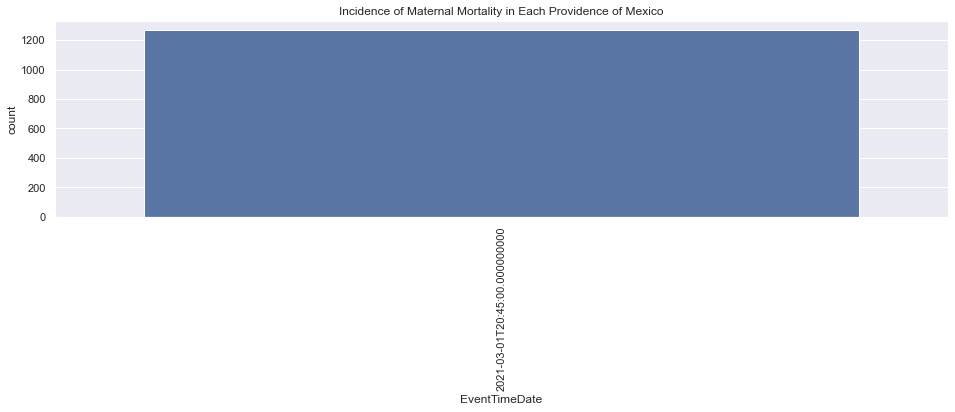

In [20]:
# Create a bar graph to show distribution of incidences of maternal death by region
fig, ax = plt.subplots(figsize=(16, 4))
plt.xticks(rotation='vertical')
plt.grid(True)
fig.subplots_adjust(bottom=0.2)
sns.countplot(cleaned_merged_df['EventTimeDate'])

# Label axis 
plt.title('Incidence of Maternal Mortality in Each Providence of Mexico')

Observations: This needs to be assessed with more data. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

### Question 2: What is the Percent Events per QuadClass? per EventType?

Observations: This needs to be assessed with more data. This exploration is briefly placed on hold until after the meeting with the Data Engineers to establish the most efficient pipeline to import GDELT's data (02 March 2021)

In [ ]:
# Number of/Percentage of events per QuadClass
# Number of/Percentages of events per EventType

In [ ]:
# Plot the variation of audio values by genre
grouped.plot(kind='bar',x='SimpleGenres',y='Energy')
grouped.plot(kind='bar',x='SimpleGenres',y='Loudness')
grouped.plot(kind='bar',x='SimpleGenres',y='Acousticness')
plt.xlabel('Mean Recorded Value of Audio Feature')
plt.show(